In [113]:
#importing the libraries

import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sn
from datetime import datetime
import matplotlib.pyplot as plt
import warnings

#for splitting
from sklearn.model_selection import train_test_split

# For Error Metrics/Evaluation Metrics
from sklearn.metrics import mean_squared_log_error, r2_score,mean_absolute_error 
from sklearn.metrics import explained_variance_score

#For Random Forest Regression
from sklearn.ensemble import RandomForestRegressor 

#For KNN
from sklearn import neighbors

#For Naive Bayes
from sklearn.naive_bayes import MultinomialNB

In [114]:
#importing the train and test data sets

train= pd.read_csv('train_data.csv')
# test= pd.read_csv('test.csv')

In [115]:
#Checking few records of the train dataset
train.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [116]:
# Checking data types of the train dataset
train.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [117]:
#Removing instant and dteday col as its of no use
train  = train.drop(["instant"],axis=1)
train  = train.drop(["dteday"],axis=1)

In [118]:
#Missing value analysis

#Create dataframe with missing percentage
missing_val = pd.DataFrame(train.isnull().sum())

# Reset index
missing_val = missing_val.reset_index()

#Rename variable
missing_val = missing_val.rename(columns = {'index': 'Features', 0: 'Missing_percentage'})

#Calculate percentage
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(train))*100

#descending order
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)

In [119]:
missing_val
#we found that there are no missing values

,Features,Missing_percentage
0,season,0.0
1,yr,0.0
2,mnth,0.0
3,holiday,0.0
4,weekday,0.0
5,workingday,0.0
6,weathersit,0.0
7,temp,0.0
8,atemp,0.0
9,hum,0.0


## EDA

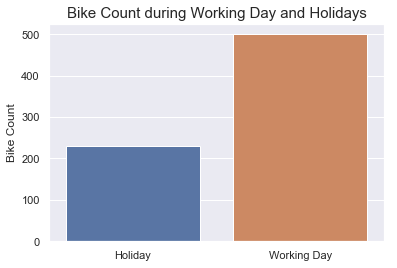

In [120]:
#plotting bargraph (based on the count of bike rent on working day)
sn.set(style="darkgrid")
ax = sn.countplot(x="workingday", data=train)
ax.set_title("Bike Count during Working Day and Holidays", fontsize= 15)
ax.set_xlabel("")
ax.set_ylabel("Bike Count")
ax.set(xticklabels=['Holiday','Working Day']);

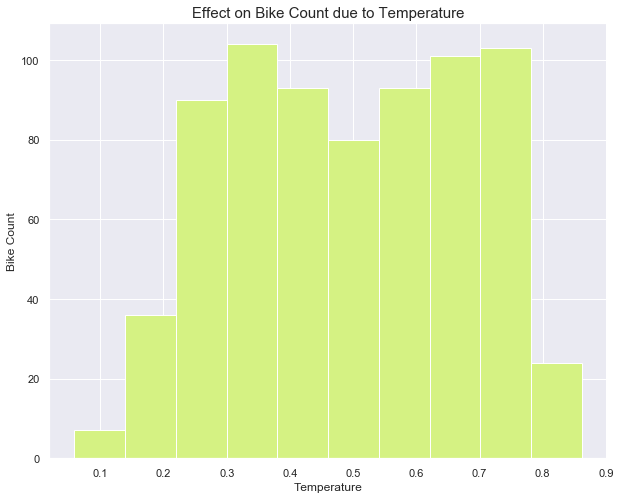

In [121]:
#effect in bike count due to temp 
plt.figure(figsize=(10,8))
train['temp'].plot(kind='hist', color= '#D5F283')
plt.xlabel("Temperature")
plt.ylabel("Bike Count")
plt.title("Effect on Bike Count due to Temperature", fontsize=15)
plt.show()


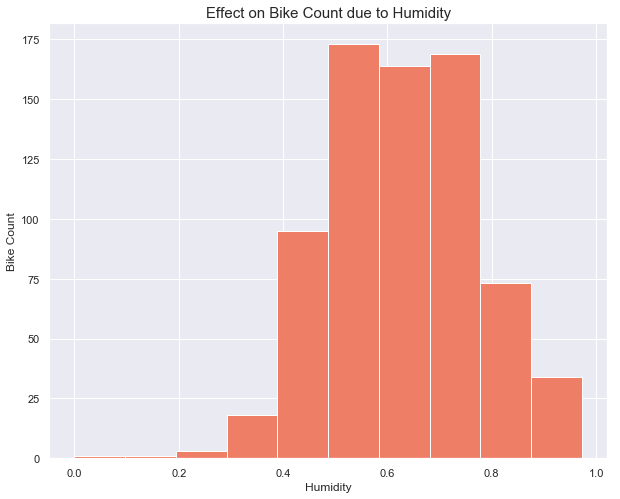

In [122]:
#effect due to humidity
plt.figure(figsize=(10,8))
train['hum'].plot(kind='hist', color='#EE7E66')
plt.xlabel("Humidity")
plt.ylabel("Bike Count")
plt.title("Effect on Bike Count due to Humidity", fontsize=15)
plt.show()

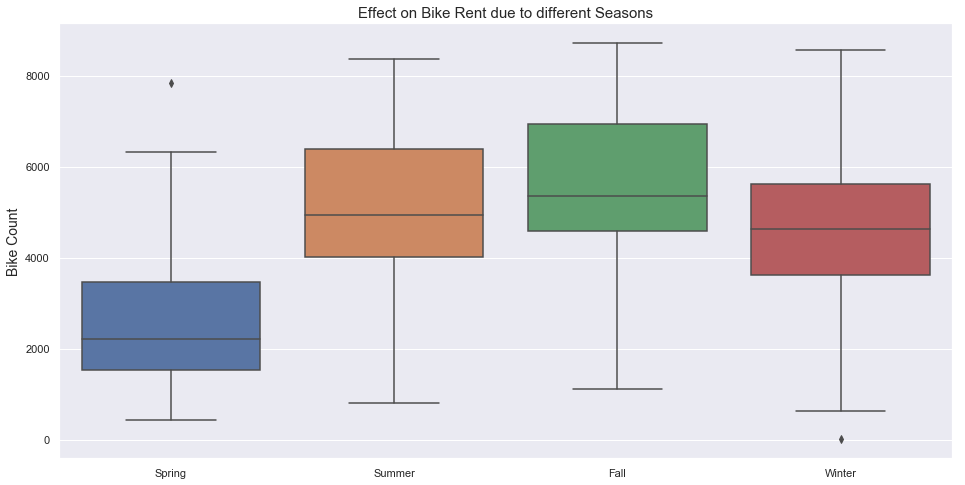

In [123]:
#checking which season has highest bike demand

ax=plt.figure(figsize=(16,8))
ax=sn.boxplot(x='season', y='cnt', data=train)
ax.set_title("Effect on Bike Rent due to different Seasons", fontsize= 15)
ax.set_xlabel("")
ax.set_ylabel("Bike Count", fontsize=14)
ax.set(xticklabels=['Spring','Summer','Fall','Winter']);

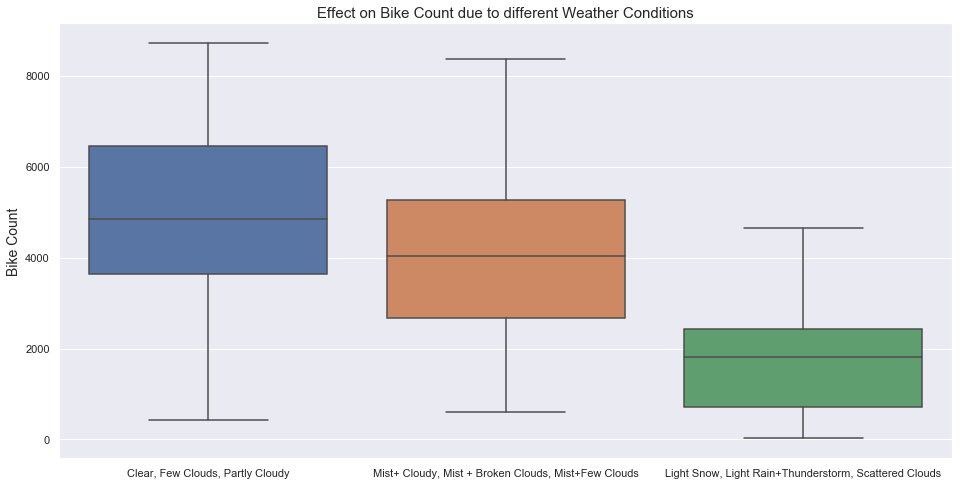

In [124]:
#checking which weather has highest bike demand

ax= plt.figure(figsize=(16,8))
ax= sn.boxplot(x='weathersit', y='cnt', data=train)
ax.set_title("Effect on Bike Count due to different Weather Conditions", fontsize= 15)
ax.set_xlabel("")
ax.set_ylabel("Bike Count", fontsize=14)
ax.set(xticklabels=['Clear, Few Clouds, Partly Cloudy','Mist+ Cloudy, Mist + Broken Clouds, Mist+Few Clouds','Light Snow, Light Rain+Thunderstorm, Scattered Clouds']);

# We can see that very less bikes are rented in type 3 weather which is Light Snow, Light Rain+Thunderstorm, Scattered Clouds, which makes sense
#highest number of bikes are rented in weather 1 which is Clear, or partly cloudy day

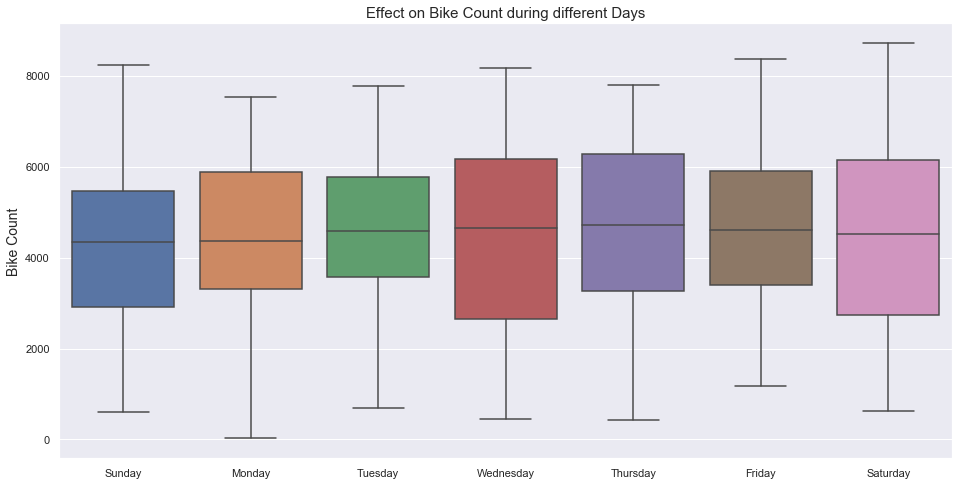

In [125]:
# Effect on Bike Count during different Days

ax= plt.figure(figsize=(16,8))
ax= sn.boxplot(x='weekday',y='cnt', data=train)
ax.set_title("Effect on Bike Count during different Days", fontsize= 15)
ax.set_xlabel("")
ax.set_ylabel("Bike Count", fontsize=14)
ax.set(xticklabels=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']);

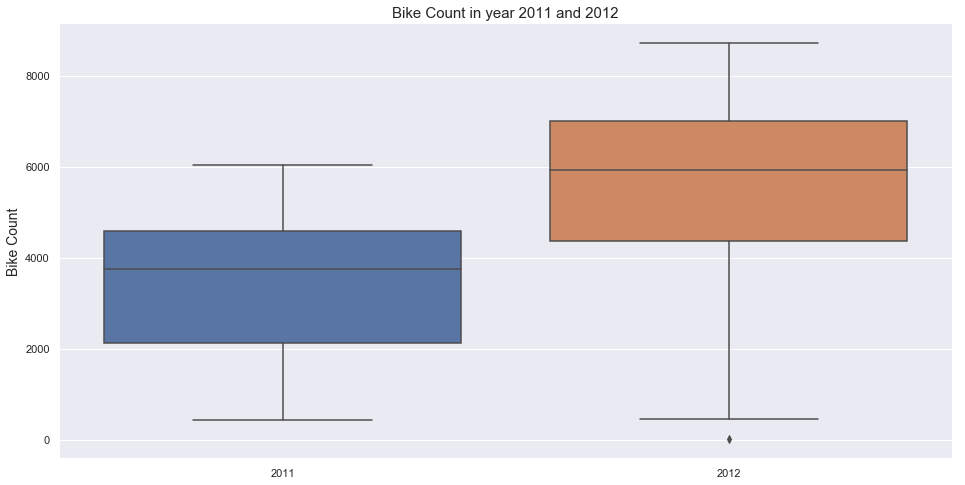

In [126]:
#More bikes are rented in 2012

ax= plt.figure(figsize=(16,8))
ax= sn.boxplot(x='yr',y='cnt', data=train)
ax.set_xlabel("")
ax.set_title("Bike Count in year 2011 and 2012", fontsize= 15)
ax.set_ylabel("Bike Count", fontsize=14)
ax.set(xticklabels=['2011','2012']);

In [127]:
#Checking Column Names
train.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [128]:
#checking datatypes
train.dtypes

season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [129]:
# converting cat variables to cat types (like season, yr, mnth, holiday, weekday, workingday, weathersit)
train['season'] = train['season'].astype('category')
train['yr'] = train['yr'].astype('category')
train['mnth'] = train['mnth'].astype('category')
train['holiday'] = train['holiday'].astype('category')
train['weekday'] = train['weekday'].astype('category')
train['workingday'] = train['workingday'].astype('category')
train['weathersit'] = train['weathersit'].astype('category')

In [130]:
#Storing continuous type variables in a variable
cont_var= ['temp','atemp','hum','windspeed','casual','registered']

In [131]:
#calculating variance of each variable, and for that creating a blank list to store their variance
var1=list()

In [132]:
#iterating on cont_var to get their variance
for i in cont_var:
    var1.append(np.var(train[i]))

In [133]:
#variance of cont variables
var1

[0.03346182905541456,
 0.026520016870821173,
 0.020258296051448844,
 0.005997703927415474,
 470805.5023738634,
 2431069.729523674]

In [134]:
#detecting and replacing outliers with NA
for i in cont_var:
    q25= train[i].quantile(0.25)
    q75= train[i].quantile(0.75)
    
    iqr= q75- q25
    
    minimum= q25- (iqr * 1.5)
    maximum= q75+ (iqr * 1.5)
    
#replace with na
    train[i] = np.where(train[i] < minimum, np.nan, train[i])
    train[i] = np.where(train[i] > maximum, np.nan, train[i])


In [135]:
#NAs value in each variable
train.isnull().sum()

season         0
yr             0
mnth           0
holiday        0
weekday        0
workingday     0
weathersit     0
temp           0
atemp          0
hum            2
windspeed     13
casual        44
registered     0
cnt            0
dtype: int64

In [136]:
#--------------------------------------------------------------------------------------------------#

In [137]:
# We tried imputing NA values by mean and median, but we are getting huge difference in variance of variables before and
# after imputing the values

In [138]:
# So we will try knn
from fancyimpute import KNN
train[cont_var]= pd. DataFrame(KNN(k=3).fit_transform(train[cont_var]), columns= cont_var)

Imputing row 1/731 with 0 missing, elapsed time: 0.082
Imputing row 101/731 with 0 missing, elapsed time: 0.083
Imputing row 201/731 with 0 missing, elapsed time: 0.083
Imputing row 301/731 with 0 missing, elapsed time: 0.084
Imputing row 401/731 with 0 missing, elapsed time: 0.084
Imputing row 501/731 with 0 missing, elapsed time: 0.085
Imputing row 601/731 with 0 missing, elapsed time: 0.086
Imputing row 701/731 with 0 missing, elapsed time: 0.088


In [139]:
#calc variance again to see the diff
knn_var=list()
for i in cont_var:
    knn_var.append(np.var(train[i]))

In [140]:
knn_var

[0.03346182905541456,
 0.026520016870821173,
 0.0195844290857231,
 0.005094713423776429,
 264683.23411983106,
 2431069.729523674]

In [141]:
# we can see that KNN is giving the best results, so we will use KNN to impute NA(outliers)

## Feature Selection

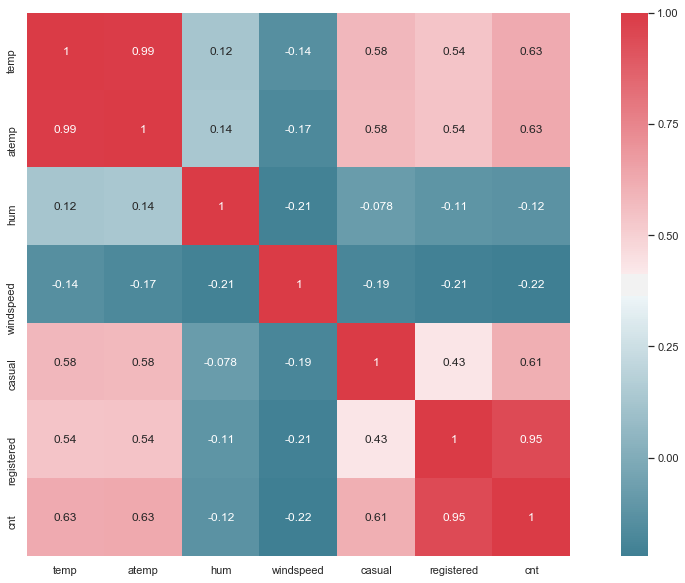

In [142]:
# Correlation plot between fields

corr= train.corr()
f, ax= plt.subplots(figsize= (18,10))
sn.heatmap(corr, mask= np.zeros_like(corr, dtype= np.bool), cmap= sn.diverging_palette(220,10,as_cmap=True),square= True, ax=ax, annot = True);

In [143]:
# We can see that temp and atemp are very highly correlated with each other, and they have same amt of correlation with output variable,
#so we will drop one of them (let's say atemp). We can see that casual and registered variables are also very correlated with each other,
# but registered is very highly correlated with output var, so we will drop casual variable

In [144]:
#dropping columns acc to corr plot
train.drop(['atemp','casual'],axis=1,inplace=True)

In [145]:
train.shape

(731, 12)

## Splitting the Dataset

In [146]:
#splitting the dataset
xTrain, xTest, yTrain, yTest = train_test_split(train.iloc[:,0:11], train.iloc[:,11], test_size = 0.2, random_state = 0)

## Applying Algorithms

## 1- Random Forest

In [93]:
# create regressor object 
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 

# fit the regressor with x and y data 
regressor.fit(xTrain,yTrain)  

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [94]:
#predicting test results
predict_random= regressor.predict(xTest)

In [95]:
#Error Metrics
#1 root mean sq log error
np.sqrt(mean_squared_log_error(predict_random,yTest))

0.07882780196363959

In [96]:
#2 variance score
explained_variance_score(predict_random, yTest)

0.9703285166256788

In [97]:
#3 MAPE
def mape (actual, predicted):
    mape= np.mean(np.abs((actual- predicted)/actual))*100
    return mape


In [98]:
mape(yTest, predict_random)

5.689876250163164

In [99]:
#4 MAE
mean_absolute_error(yTest, predict_random)

219.96857142857147

In [100]:
#5 R squared
r2_score(yTest, predict_random)

0.9726462429732712

## 2- KNN

In [101]:
model_knn = neighbors.KNeighborsRegressor(n_neighbors = 7)
model_knn.fit(xTrain, yTrain)  #fit the model
predict_knn = model_knn.predict(xTest) #make prediction on test set

In [102]:
#Error Metrics
#1 root mean sq log error
np.sqrt(mean_squared_log_error(predict_knn,yTest))

0.15334984308141855

In [103]:
#2 variance score
explained_variance_score(predict_knn, yTest)

0.8683245648803115

In [104]:
#3 MAPE
def mape (actual, predicted):
    mape= np.mean(np.abs((actual- predicted)/actual))*100
    return mape

mape(yTest, predict_knn)

11.399233373595786

In [105]:
#4 MAE
mean_absolute_error(yTest, predict_knn)

483.33041788143834

In [106]:
#5 R squared
r2_score(yTest, predict_knn)

0.8815072232722061

## 3- Naive Bayes Regressor

In [107]:
model_naive = MultinomialNB().fit(xTrain, yTrain)

#predicting
predicted_naive= model_naive.predict(xTest)

In [108]:
#Error Metrics
#1 root mean sq log error
np.sqrt(mean_squared_log_error(predicted_naive,yTest))

0.49407720175321956

In [109]:
#2 variance score
explained_variance_score(predicted_naive, yTest)

0.300278685306429

In [110]:
#3 MAPE
def mape (actual, predicted):
    mape= np.mean(np.abs((actual- predicted)/actual))*100
    return mape

mape(yTest, predicted_naive)

52.58846361245618

In [111]:
#4 MAE
mean_absolute_error(yTest, predicted_naive)

1491.2448979591836

In [112]:
#5 R squared
r2_score(yTest, predicted_naive)

0.08907149690699034

## We can see that we are getting the best results from Random Forest Algorithm

## Creating Actual vs Predicted Values File

In [55]:
#conv yTest(Actual Values) to numpy array
yTest= yTest.to_numpy()

In [56]:
#creating df of Actual and Predicted Values
df= pd.DataFrame(predict_random, yTest)
df= df.reset_index()

In [57]:
#Setting Column Names
df.columns= ['Actual','Predicted']

In [58]:
#Saving the df as file
df.to_csv("Actual vs Predicted(From Python).csv", index=False)

In [604]:
#------------------------------*---------------------------------------------------#